In [194]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import empirical_covariance
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('wines.csv', delimiter=',', skip_header = 1)

# Problem 1

In [73]:
scaler = StandardScaler()
zscored = scaler.fit_transform(data)
covariance_matrix = empirical_covariance(zscored)
pca = PCA(whiten=True)
pca.fit(covariance_matrix)

PCA(whiten=True)

In [79]:
eigenvalues = pca.explained_variance_
print(eigenvalues)
print((eigenvalues[1]+eigenvalues[0])/sum(eigenvalues))
eigenvectors = pca.components_
print(eigenvectors)

[1.57196627e+00 3.79358999e-01 9.65372891e-02 7.00544965e-02
 5.12790232e-02 3.43079195e-02 1.58663755e-02 8.99730597e-03
 5.88017814e-03 5.05484636e-03 3.29498648e-03 9.28115796e-04
 3.70788946e-34]
0.8697583350109813
[[-0.06907851  0.29502398  0.09668899  0.27681959 -0.08520482 -0.36370004
  -0.40409792  0.32683805 -0.28587825  0.16781803 -0.32419129 -0.38250471
  -0.22639838]
 [ 0.52136445  0.1136217   0.08193206 -0.25585621  0.27175784  0.05184576
  -0.00483475 -0.12649372  0.0102144   0.52479752 -0.27584126 -0.17115552
   0.41186192]
 [-0.14664694 -0.04938785  0.64694033  0.51399836  0.46295338  0.10079222
   0.11788646 -0.18471369  0.09705762  0.00402992 -0.08574449  0.05878049
  -0.02417562]
 [-0.05804741  0.52717761 -0.17703758  0.10661104 -0.23447531  0.1884622
   0.14921189 -0.28616755  0.41534454  0.06167784 -0.460275    0.17511206
  -0.25004153]
 [-0.22966506  0.09404428 -0.42906712 -0.15613913  0.69895414 -0.23718192
  -0.20133196 -0.26025005  0.12858844 -0.15010061  0.015

2.243525806318869


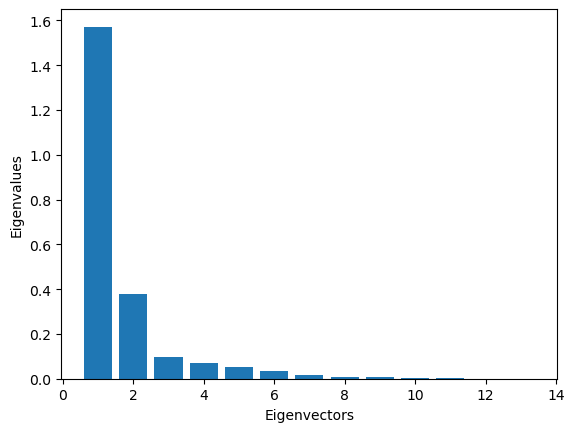

In [80]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13], eigenvalues)
plt.xlabel("Eigenvectors")
plt.ylabel("Eigenvalues")

In [144]:
pca = PCA(n_components=2, whiten=True)
pca.fit(covariance_matrix)
transformed = pca.transform(zscored)

Text(0.5, 1.0, '2D PCA')

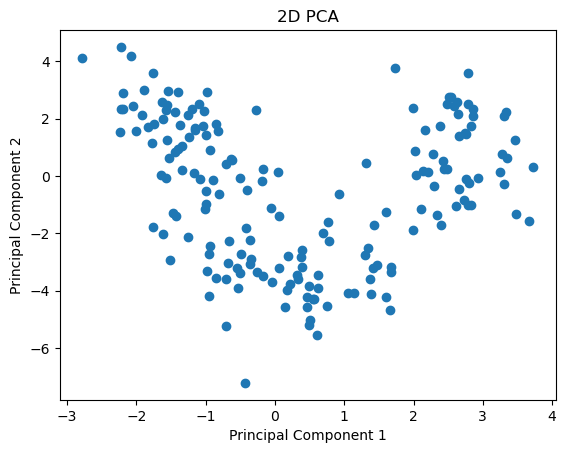

In [145]:
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')

# Problem 2

In [117]:
KL = np.zeros(146, dtype=float)
Perplexity = np.arange(5,151)

In [120]:
for i in range(0,146):
    tsne = TSNE(n_components=2, perplexity=i+5, n_jobs=-1)
    fit_tsne = tsne.fit_transform(zscored)
    print(tsne.kl_divergence_)
    KL[i] = tsne.kl_divergence_

0.632056713104248
0.64139324426651
0.6180750727653503
0.6005612015724182
0.6266932487487793
0.59085613489151
0.589469313621521
0.549663782119751
0.5317460298538208
0.5203661918640137
0.5300586223602295
0.5097503662109375
0.49409016966819763
0.4626927077770233
0.4546460211277008
0.44149088859558105
0.46764689683914185
0.43529099225997925
0.44672101736068726
0.4227255582809448
0.4036574959754944
0.41552498936653137
0.41070592403411865
0.37656882405281067
0.3752914369106293
0.38523441553115845
0.3525504469871521
0.3594908118247986
0.3432673513889313
0.3315945863723755
0.3187340497970581
0.314403235912323
0.33034276962280273
0.30981653928756714
0.3029811382293701
0.2987247705459595
0.28550615906715393
0.2853616178035736
0.29038697481155396
0.2809353768825531
0.26513105630874634
0.26218512654304504
0.24946385622024536
0.2543727159500122
0.2438824623823166
0.24533556401729584
0.22620555758476257
0.223800390958786
0.2198265790939331
0.2241421937942505
0.2234010547399521
0.2148832380771637
0.2

In [121]:
print(KL)

[0.63205671 0.64139324 0.61807507 0.6005612  0.62669325 0.59085613
 0.58946931 0.54966378 0.53174603 0.52036619 0.53005862 0.50975037
 0.49409017 0.46269271 0.45464602 0.44149089 0.4676469  0.43529099
 0.44672102 0.42272556 0.4036575  0.41552499 0.41070592 0.37656882
 0.37529144 0.38523442 0.35255045 0.35949081 0.34326735 0.33159459
 0.31873405 0.31440324 0.33034277 0.30981654 0.30298114 0.29872477
 0.28550616 0.28536162 0.29038697 0.28093538 0.26513106 0.26218513
 0.24946386 0.25437272 0.24388246 0.24533556 0.22620556 0.22380039
 0.21982658 0.22414219 0.22340105 0.21488324 0.22280523 0.20817983
 0.21437292 0.19200687 0.19210383 0.18032742 0.18467705 0.1809395
 0.17375621 0.17426917 0.16926721 0.17444339 0.16436237 0.16426703
 0.16024327 0.15969044 0.14888558 0.14589062 0.15315273 0.14728634
 0.14250609 0.14104624 0.1464954  0.13019323 0.12979607 0.12976885
 0.12919365 0.1335617  0.12305072 0.12199974 0.11667253 0.11855237
 0.1186727  0.11348309 0.11139067 0.10235586 0.10924526 0.10139

Text(0, 0.5, 'KL-divergence')

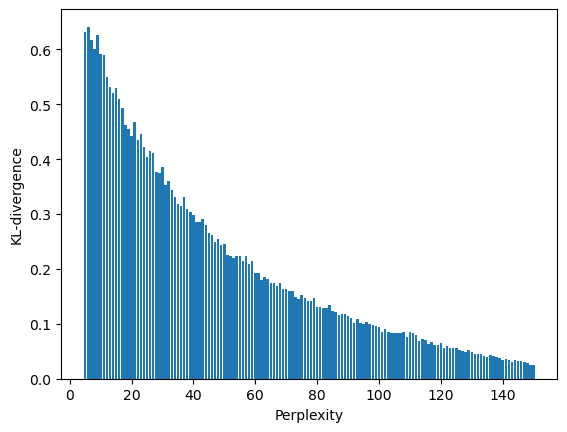

In [123]:
plt.bar(Perplexity, KL)
plt.xlabel('Perplexity')
plt.ylabel('KL-divergence')

Text(0, 0.5, 'Component 2')

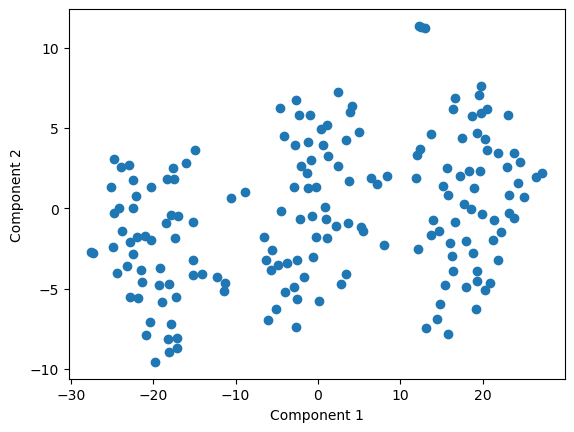

In [129]:
tsne = TSNE(n_components=2, perplexity=20, n_jobs=-1)
fit_tsne = tsne.fit_transform(zscored)
plt.scatter(fit_tsne[:, 0], fit_tsne[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Problem 3

In [139]:
mds = MDS(n_components=2, n_init=100, max_iter = 10000, dissimilarity='euclidean', normalized_stress='auto') 
X_mds = mds.fit_transform(zscored)
print(mds.stress_)

21192.94066401585


Text(0, 0.5, 'Component 2')

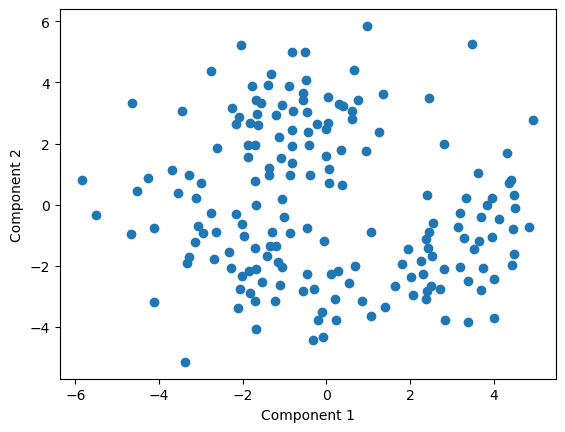

In [140]:
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Problem 4

Text(0, 0.5, 'Silhouette coefficient')

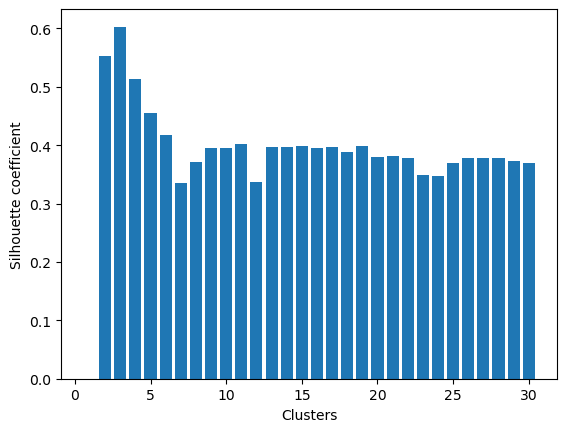

In [170]:
silhouettes = np.zeros(30)

for k in range(2, 31):
    kmeans = KMeans(k, n_init='auto')
    labels = kmeans.fit_predict(fit_tsne)
    silhouettes[k-1] = silhouette_score(fit_tsne, labels)
plt.bar(np.arange(1,31), silhouettes)
plt.xlabel('Clusters')
plt.ylabel('Silhouette coefficient')

In [175]:
silhouettes[11]

0.33732661604881287

In [176]:
silhouettes[6]

0.3352016806602478

Text(0, 0.5, 'Component 2')

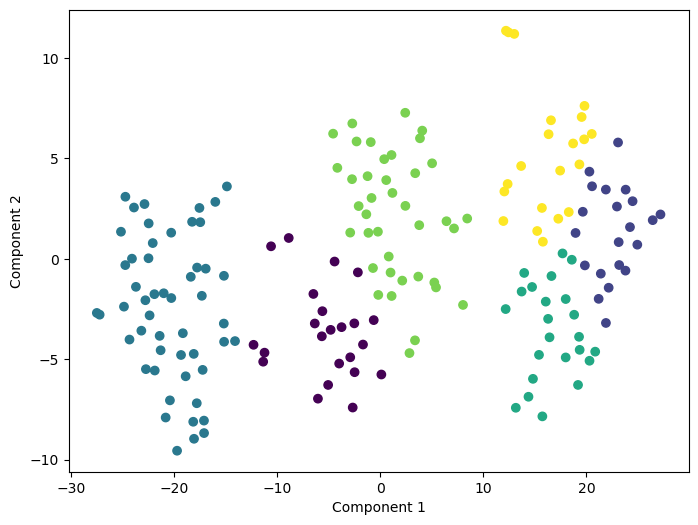

In [181]:
kmeans = KMeans(6, n_init='auto')
labels = kmeans.fit_predict(fit_tsne)
plt.figure(figsize=(8, 6))
plt.scatter(fit_tsne[:,0], fit_tsne[:,1], c=kmeans.labels_.astype(float))
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [184]:
kmeans.inertia_

3207.763671875

# Problem 5

In [189]:
np.log(len(fit_tsne[:,0]))

5.181783550292085

Text(0, 0.5, 'Component 2')

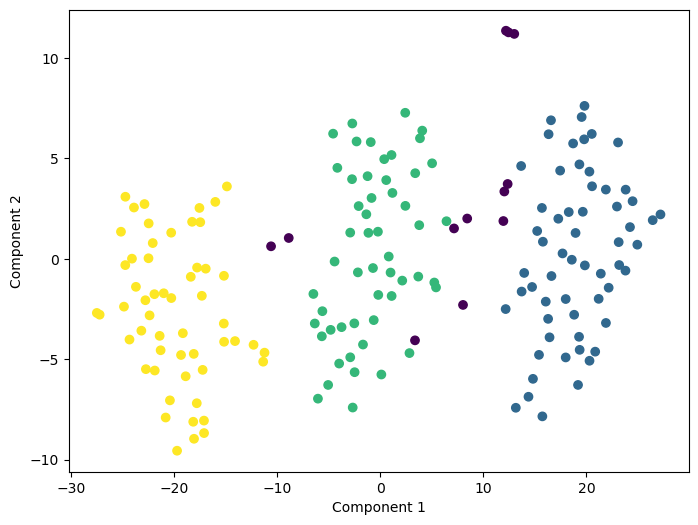

In [209]:
dbscan = DBSCAN(eps = 3, min_samples=5)
labels = dbscan.fit_predict(fit_tsne)
plt.figure(figsize=(8, 6))
plt.scatter(fit_tsne[:,0], fit_tsne[:,1], c=dbscan.labels_.astype(float))
plt.xlabel('Component 1')
plt.ylabel('Component 2')